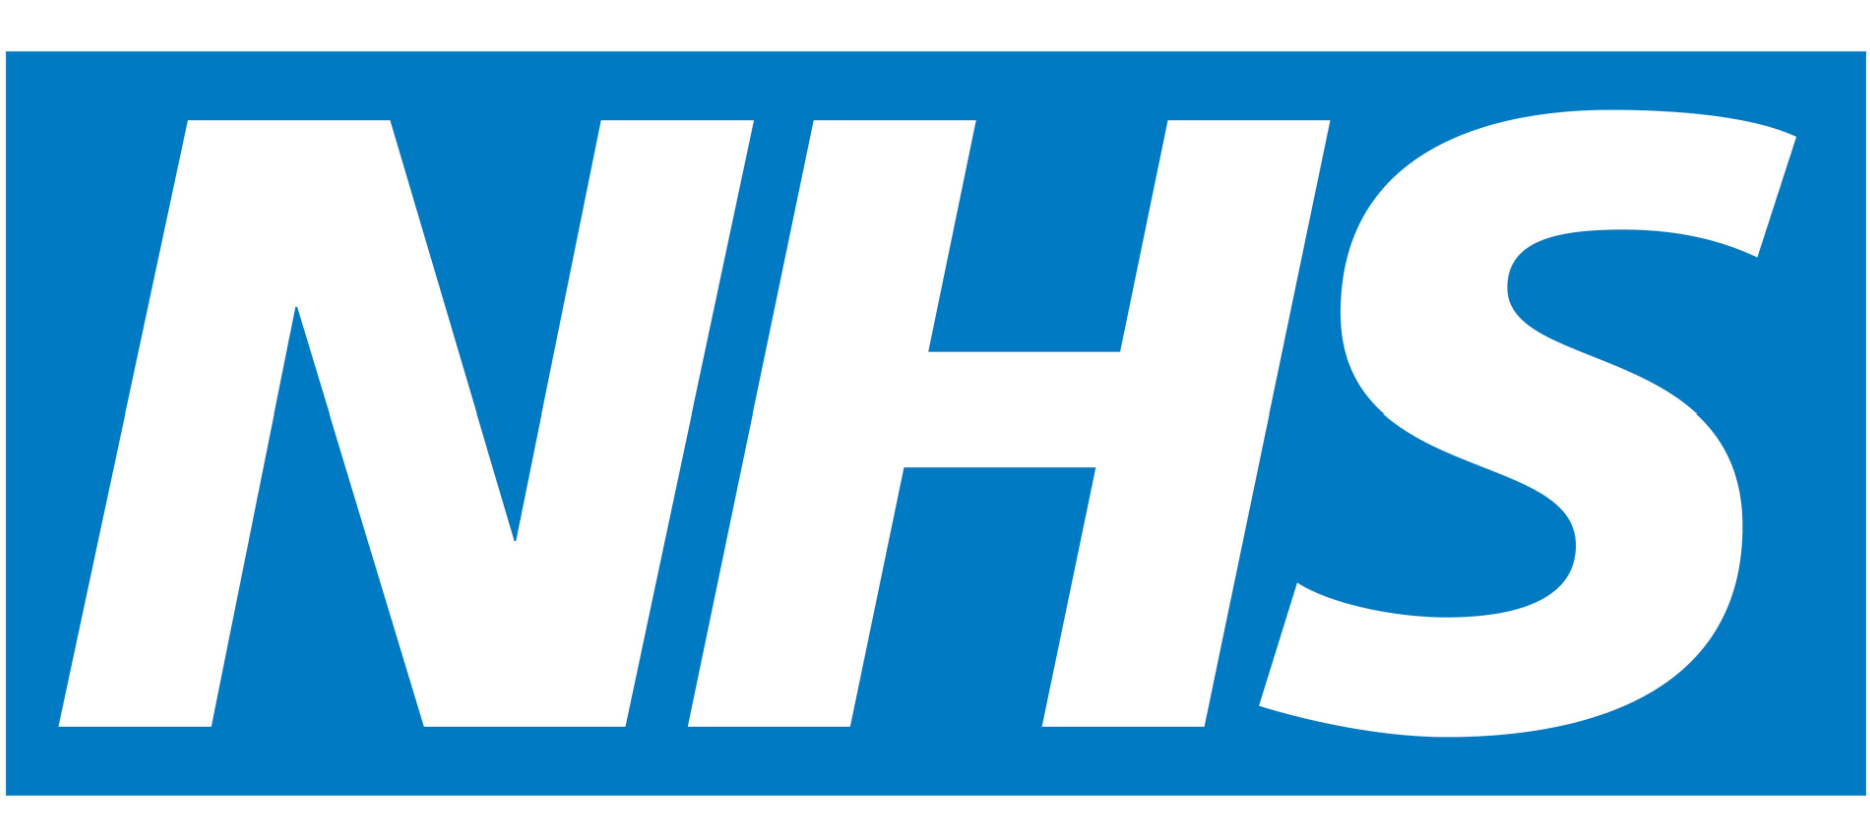

## 🏥 NHS Bedsitrep Analysis Note

This note provides a **step-by-step guide** detailing how the NHS Bedsitrep dataset was combined, explored, and standardized for analysis. The focus is on understanding the structure and meaning of each column, ensuring consistency across entries, and preparing the data for visualization and insight generation.

### Purpose
To clean and unify multiple Bedsitrep datasets—national, regional, ICB, and provider-level—into a coherent format suitable for Power BI dashboarding and statistical analysis.

### Key Actions
- **Column-by-column review** to interpret values and identify inconsistencies.
- **Standardization of categorical fields** such as `Metric Type`, `Org Name`, and `Region`.
- **Deduplication** at the **Provider level**, where true activity occurs.
- **Exporting cleaned datasets** to CSV and Excel formats for downstream use.

### 📈 Dashboard Link
The final dashboard visualizing provider-level bed activity is available on Power BI:  
[View NHS Bedsitrep Dashboard](https://app.powerbi.com/view?r=eyJrIjoiMjJjZWVlNmItMDVmYS00MjEyLTk3MmItMGNmODA4Njk2OWNmIiwidCI6IjQ5ZDY2N2E3LWI2NGMtNDlkNC1iMDNlLWRmMjEzNDQzZDMyNyJ9)

### Insight Summary
- Hospitals are classified into **Safe**, **High**, **Critical**, and **Extreme** occupancy tiers.
- The **Midlands region** faces the highest pressure, with an average occupancy of **92.82%**.
- **Length of stay (LOS)** is strongly correlated with occupancy, especially stays of **≥7 days**.
- Seasonal peaks occur from **October to February**, driving winter pressures.

### Recommendations
- Target reduction of **7+ day stays** to ease bed strain.
- Prioritize surge planning in **Critical and Extreme** trusts.
- Allocate resources to the **Midlands**, the most pressured region.

### Conclusion
This note serves as both a technical guide and strategic overview, helping stakeholders understand how data preparation feeds into actionable insights for NHS bed management.


In [1]:
import pandas as pd
import glob
import numpy as np

In [3]:
file_paths = glob.glob(r"C:\Users\Ogunl\Desktop\Data Science\NHS Dataset\Bedstrip\202*.csv")

In [4]:
file_paths

['C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202405-May-2024-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202406-June-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202407-July-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202408-August-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202409-September-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202410-October-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202411-November-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\\Data Science\\NHS Dataset\\Bedstrip\\202412-December-2024-beds-sitrep-data-FINAL-revised.csv',
 'C:\\Users\\Ogunl\\Desktop\

In [5]:
dfs = map(pd.read_csv, file_paths)
dfs

In [6]:
combined_df = pd.concat(list(dfs))

In [7]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Unnamed: 9,Unnamed: 10
0,01/05/2024,National,[z],[z],ENG,ENGLAND,G&A beds available,Type 1,100244,NaN,NaN
1,01/05/2024,Region,EAST OF ENGLAND,[z],Y61,EAST OF ENGLAND,G&A beds available,Type 1,10852,NaN,NaN
2,01/05/2024,Region,LONDON,[z],Y56,LONDON,G&A beds available,Type 1,14266,NaN,NaN
3,01/05/2024,Region,MIDLANDS,[z],Y60,MIDLANDS,G&A beds available,Type 1,18970,NaN,NaN
4,01/05/2024,Region,NORTH EAST AND YORKSHIRE,[z],Y63,NORTH EAST AND YORKSHIRE,G&A beds available,Type 1,17485,NaN,NaN


In [8]:
combined_df['Region'] = combined_df['Region'].str.upper()
combined_df['Org Name'] = combined_df['Org Name'].str.upper()
combined_df['Level'] = combined_df['Level'].str.upper()
combined_df['Org Code'] = combined_df['Org Code'].str.upper()
combined_df['Metric'] = combined_df['Metric'].str.upper()
combined_df['Type'] = combined_df['Type'].str.upper()
combined_df['ICB'] = combined_df['ICB'].str.upper()


In [9]:
combined_df.Period.unique()

array(['01/05/2024', '01/06/2024', '01/07/2024', '01/08/2024',
       '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', nan,
       '01/01/2025', '01/02/2025', '01/03/2025', '01/04/2025',
       '01/05/2025', '01/06/2025'], dtype=object)

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118197 entries, 0 to 8423
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Period       118188 non-null  object 
 1   Level        118188 non-null  object 
 2   Region       118188 non-null  object 
 3   ICB          118188 non-null  object 
 4   Org Code     118188 non-null  object 
 5   Org Name     118188 non-null  object 
 6   Metric       118188 non-null  object 
 7   Type         118188 non-null  object 
 8   Value        118185 non-null  object 
 9   Unnamed: 9   0 non-null       float64
 10  Unnamed: 10  0 non-null       float64
dtypes: float64(2), object(9)
memory usage: 10.8+ MB


In [10]:
# Convert Period to datetime, specifying the date format
combined_df['Period'] = pd.to_datetime(combined_df['Period'], format='%d/%m/%Y')

# The format string '%A, %B %d, %Y' will produce the desired output
combined_df['Period'] = combined_df['Period'].dt.strftime('%B %d, %Y')


In [12]:
combined_df.Period.unique()

array(['May 01, 2024', 'June 01, 2024', 'July 01, 2024',
       'August 01, 2024', 'September 01, 2024', 'October 01, 2024',
       'November 01, 2024', 'December 01, 2024', nan, 'January 01, 2025',
       'February 01, 2025', 'March 01, 2025', 'April 01, 2025',
       'May 01, 2025', 'June 01, 2025'], dtype=object)

In [15]:
combined_df.describe()

,Unnamed: 9,Unnamed: 10
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [16]:
combined_df.shape

(118197, 11)

In [17]:
combined_df.columns

Index(['Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name', 'Metric',
       'Type', 'Value', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [18]:
combined_df.drop(columns = ['Unnamed: 10', 'Unnamed: 9'], inplace = True)

In [19]:
combined_df.columns

Index(['Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name', 'Metric',
       'Type', 'Value'],
      dtype='object')

### Checking for Duplicates

In [21]:
combined_df[combined_df.duplicated()]


,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
8425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### seeing that all the duplicates are nan and empty, I will proceed to drop them.

In [23]:
combined_df = combined_df.drop_duplicates()


In [24]:
#Confirm by checking for duplicates
combined_df[combined_df.duplicated()]


,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value


### Checking for missing values

In [26]:
combined_df.isna().sum()


Period      1
Level       1
Region      1
ICB         1
Org Code    1
Org Name    1
Metric      1
Type        1
Value       4
dtype: int64

In [27]:
#check to see where the missing values are
combined_df[combined_df.isna().any(axis=1)]


,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
7871,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN
8106,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN
8341,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN
8424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Apparently duplicated left 8424 as the original. So, I will remove it. And wait leave the remaining nans in value until i understand the column and deal with it appropriately.

In [29]:
#drop row 8428
combined_df = combined_df.drop(index=8424)


In [30]:
#Confirm
nan = combined_df[combined_df.isna().any(axis=1)]
nan

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
7871,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN
8106,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN
8341,"November 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,NaN


> ##### We are left with 3 nan for now.


In [32]:
nan.Type.unique()

array(['TYPE 1'], dtype=object)

In [33]:
nan.Metric.unique()

array(['% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 7 OR MORE DAYS',
       '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 14 OR MORE DAYS',
       '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 21 OR MORE DAYS'],
      dtype=object)

In [34]:
nan.ICB.unique()

array(['NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD'], dtype=object)

## These nan are from the same Hospital: 'NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD'

In [36]:
NCL_metrics = [
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 7 OR MORE DAYS',
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 14 OR MORE DAYS',
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 21 OR MORE DAYS'
]

NCLicb = combined_df[
    (combined_df['ICB'] == 'NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD') &
    (combined_df['Metric'].isin(NCL_metrics)) &
    (combined_df['Value'])
]


In [37]:
NCLicb

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
7769,"May 01, 2024",ICB,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,QMJ,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,0.60938884
7819,"May 01, 2024",ICB,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,QMJ,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,ALL TYPE,0.586582809
7869,"May 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAL,ROYAL FREE LONDON NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,0.623093682
7870,"May 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAN,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,0.18699187
7871,"May 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAP,NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,0.769736842
...,...,...,...,...,...,...,...,...,...
8305,"June 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RAN,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,0.2421875
8306,"June 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RKE,WHITTINGTON HEALTH NHS TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,0.215859031
8307,"June 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,#DIV/0!
8308,"June 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP6,MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,0


#### Oops! There is `#DIV/0!`. Let me check them out.

In [39]:
combined_df[combined_df['Value'] == '#DIV/0!']

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
7839,"May 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,#DIV/0!
7892,"May 01, 2025",PROVIDER,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,RCU,SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
7905,"May 01, 2025",PROVIDER,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD,RBS,ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
8073,"May 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,#DIV/0!
8126,"May 01, 2025",PROVIDER,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,RCU,SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
8139,"May 01, 2025",PROVIDER,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD,RBS,ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
8307,"May 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,#DIV/0!
8360,"May 01, 2025",PROVIDER,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,RCU,SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
8373,"May 01, 2025",PROVIDER,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD,RBS,ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,TYPE 1,#DIV/0!
7839,"June 01, 2025",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,OTHER,#DIV/0!


In [40]:
div0_rows = combined_df[combined_df['Value'] == '#DIV/0!']
div0_summary = div0_rows.groupby(['Period','Org Name', 'Metric']).size().reset_index(name='Count')


In [41]:
div0_summary

,Period,Org Name,Metric,Count
0,"June 01, 2025",ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
1,"June 01, 2025",ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
2,"June 01, 2025",ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
3,"June 01, 2025",GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
4,"June 01, 2025",GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
5,"June 01, 2025",GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
6,"June 01, 2025",SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
7,"June 01, 2025",SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
8,"June 01, 2025",SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1
9,"May 01, 2025",ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,1


#### `#DIV/0!` was imputed in May and June 2025.

### Studying through the columns


In [44]:
### It is good to stand with the Value. Because of the present of the `#DIV/0!`. However, I think understanding the metrics is as essentials.

## `Metric`

In [46]:
combined_df.Metric.unique()

array(['G&A BEDS AVAILABLE', 'G&A CORE BEDS AVAILABLE',
       'G&A ESCALATION BEDS AVAILABLE', 'G&A COVID VOID BEDS',
       'G&A BEDS OCCUPIED', 'G&A OCCUPANCY RATE',
       'G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS',
       'ADULT G&A BEDS AVAILABLE', 'ADULT CORE BEDS AVAILABLE',
       'ADULT ESCALATION BEDS AVAILABLE', 'ADULT G&A COVID VOID BEDS',
       'ADULT G&A BEDS OCCUPIED', 'ADULT G&A OCCUPANCY RATE',
       'ADULT G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS',
       'PAEDIATRIC G&A BEDS AVAILABLE', 'PAEDIATRIC CORE BEDS AVAILABLE',
       'PAEDIATRIC ESCALATION BEDS AVAILABLE',
       'PAEDIATRIC G&A COVID VOID BEDS', 'PAEDIATRIC G&A BEDS OCCUPIED',
       'PAEDIATRIC G&A OCCUPANCY RATE',
       'PAEDIATRIC G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS',
       'ADULT CRITICAL CARE BEDS AVAILABLE',
       'ADULT CRITICAL CARE BEDS OCCUPIED',
       'ADULT CRITICAL CARE OCCUPANCY RATE',
       'PAEDIATRIC INTENSIVE CARE BEDS AVAILABLE',
       'PAEDIATRIC INTEN

In [47]:
combined_df.Metric.nunique()

36

#### For ease with sorting and visualization. I will rename the variables in the `Metric` column.

In [49]:
metric_rename_map = {
    'G&A BEDS AVAILABLE': 'G&A BA',
    'G&A CORE BEDS AVAILABLE': 'G&A Core BA',
    'G&A ESCALATION BEDS AVAILABLE': 'G&A Escalation BA',
    'G&A COVID VOID BEDS': 'G&A COVID Void Beds',
    'G&A BEDS OCCUPIED': 'G&A BO',
    'G&A OCCUPANCY RATE': 'G&A OR',
    'G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS': 'G&A OR (Adj. COVID)',
    
    'ADULT G&A BEDS AVAILABLE': 'Adult G&A BA',
    'ADULT CORE BEDS AVAILABLE': 'Adult Core BA',
    'ADULT ESCALATION BEDS AVAILABLE': 'Adult Escalation BA',
    'ADULT G&A COVID VOID BEDS': 'Adult G&A COVID Void Beds',
    'ADULT G&A BEDS OCCUPIED': 'Adult G&A BO',
    'ADULT G&A OCCUPANCY RATE': 'Adult G&A OR',
    'ADULT G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS': 'Adult G&A OR (Adj. COVID)',
    
    'PAEDIATRIC G&A BEDS AVAILABLE': 'Paeds G&A BA',
    'PAEDIATRIC CORE BEDS AVAILABLE': 'Paeds Core BA',
    'PAEDIATRIC ESCALATION BEDS AVAILABLE': 'Paeds Escalation BA',
    'PAEDIATRIC G&A COVID VOID BEDS': 'Paeds COVID Void Beds',
    'PAEDIATRIC G&A BEDS OCCUPIED': 'Paeds G&A BO',
    'PAEDIATRIC G&A OCCUPANCY RATE': 'Paeds G&A OR',
    'PAEDIATRIC G&A OCCUPANCY RATE ADJUSTED FOR COVID VOID BEDS': 'Paeds G&A OR (Adj. COVID)',
    
    'ADULT CRITICAL CARE BEDS AVAILABLE': 'ACC BA',
    'ADULT CRITICAL CARE BEDS OCCUPIED': 'ACC BO',
    'ADULT CRITICAL CARE OCCUPANCY RATE': 'ACC OR',
    
    'PAEDIATRIC INTENSIVE CARE BEDS AVAILABLE': 'PICU BA',
    'PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED': 'PICU BO',
    'PAEDIATRIC INTENSIVE CARE OCCUPANCY RATE': 'PICU OR',
    
    'NEONATAL INTENSIVE CARE BEDS AVAILABLE': 'NICU BA',
    'NEONATAL INTENSIVE CARE BEDS OCCUPIED': 'NICU BO',
    'NEONATAL INTENSIVE CARE OCCUPANCY RATE': 'NICU OR',
    
    'NUMBER OF G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 7 OR MORE DAYS': 'LOS ≥7 Days (Count)',
    'NUMBER OF G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 14 OR MORE DAYS': 'LOS ≥14 Days (Count)',
    'NUMBER OF G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 21 OR MORE DAYS': 'LOS ≥21 Days (Count)',
    
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 7 OR MORE DAYS': 'LOS ≥7 Days (%)',
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 14 OR MORE DAYS': 'LOS ≥14 Days (%)',
    '% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH A LENGTH OF STAY OF - 21 OR MORE DAYS': 'LOS ≥21 Days (%)'
}

In [50]:
combined_df['Metric Original'] = combined_df['Metric']
combined_df['Metric'] = combined_df['Metric'].replace(metric_rename_map)


In [51]:
combined_df.Metric.nunique()

36

In [52]:
#confirm rename
combined_df.Metric.unique()

array(['G&A BA', 'G&A Core BA', 'G&A Escalation BA',
       'G&A COVID Void Beds', 'G&A BO', 'G&A OR', 'G&A OR (Adj. COVID)',
       'Adult G&A BA', 'Adult Core BA', 'Adult Escalation BA',
       'Adult G&A COVID Void Beds', 'Adult G&A BO', 'Adult G&A OR',
       'Adult G&A OR (Adj. COVID)', 'Paeds G&A BA', 'Paeds Core BA',
       'Paeds Escalation BA', 'Paeds COVID Void Beds', 'Paeds G&A BO',
       'Paeds G&A OR', 'Paeds G&A OR (Adj. COVID)', 'ACC BA', 'ACC BO',
       'ACC OR', 'PICU BA', 'PICU BO', 'PICU OR', 'NICU BA', 'NICU BO',
       'NICU OR', 'LOS ≥7 Days (Count)', 'LOS ≥14 Days (Count)',
       'LOS ≥21 Days (Count)', 'LOS ≥7 Days (%)', 'LOS ≥14 Days (%)',
       'LOS ≥21 Days (%)'], dtype=object)

In [53]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE


In [54]:
#check the shape again
combined_df.shape

(118181, 10)

### Checking out `Metric`

In [60]:
 LOS_21 = combined_df[combined_df.Metric == 'LOS ≥21 Days (%)']
 LOS_21.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original
8225,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,LOS ≥21 Days (%),TYPE 1,0.204423165,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
8226,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,LOS ≥21 Days (%),TYPE 1,0.168943719,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
8227,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,LOS ≥21 Days (%),TYPE 1,0.254571248,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
8228,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,LOS ≥21 Days (%),TYPE 1,0.163080541,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
8229,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,LOS ≥21 Days (%),TYPE 1,0.208799741,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...


In [61]:
LOS_21.Type.unique()

array(['TYPE 1', 'ALL TYPE', 'OTHER'], dtype=object)

In [62]:
LOS_21.Type.value_counts()

Type
TYPE 1      2395
ALL TYPE     700
OTHER        182
Name: count, dtype: int64

In [63]:
 LOS_14 = combined_df[combined_df.Metric == 'LOS ≥14 Days (%)']
 LOS_14.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original
7990,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,LOS ≥14 Days (%),TYPE 1,0.311523274,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7991,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,LOS ≥14 Days (%),TYPE 1,0.273858075,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7992,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,LOS ≥14 Days (%),TYPE 1,0.365148172,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7993,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,LOS ≥14 Days (%),TYPE 1,0.266666667,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7994,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,LOS ≥14 Days (%),TYPE 1,0.317437722,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...


In [64]:
LOS_14.Type.value_counts()

Type
TYPE 1      2401
ALL TYPE     700
OTHER        182
Name: count, dtype: int64

In [65]:
 LOS_7 = combined_df[combined_df.Metric == 'LOS ≥7 Days (%)']
 LOS_7.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original
7755,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,LOS ≥7 Days (%),TYPE 1,0.525723491,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7756,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,LOS ≥7 Days (%),TYPE 1,0.492353181,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7757,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,LOS ≥7 Days (%),TYPE 1,0.576450189,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7758,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,LOS ≥7 Days (%),TYPE 1,0.482716049,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...
7759,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,LOS ≥7 Days (%),TYPE 1,0.535231317,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...


In [66]:
LOS_7.Type.value_counts()

Type
TYPE 1      2401
ALL TYPE     700
OTHER        182
Name: count, dtype: int64

In [67]:
print(f'for LOS 7 {LOS_7.Type.value_counts()}, for 14 {LOS_14.Type.value_counts()}, for 21 {LOS_21.Type.value_counts()}')

for LOS 7 Type
TYPE 1      2401
ALL TYPE     700
OTHER        182
Name: count, dtype: int64, for 14 Type
TYPE 1      2401
ALL TYPE     700
OTHER        182
Name: count, dtype: int64, for 21 Type
TYPE 1      2395
ALL TYPE     700
OTHER        182
Name: count, dtype: int64


In [68]:
picu_bo = combined_df[combined_df.Metric == 'PICU BO']

In [69]:
picu_bo.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original
5875,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,PICU BO,TYPE 1,245,PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED
5876,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,PICU BO,TYPE 1,5,PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED
5877,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,PICU BO,TYPE 1,56,PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED
5878,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,PICU BO,TYPE 1,57,PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED
5879,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,PICU BO,TYPE 1,33,PAEDIATRIC INTENSIVE CARE BEDS OCCUPIED


In [70]:
picu_bo.Type.value_counts()

Type
TYPE 1      2401
ALL TYPE     700
OTHER        182
Name: count, dtype: int64

In [71]:
metrics_of_interest = [
    'G&A BA', 'G&A Core BA', 'G&A Escalation BA', 'G&A COVID Void Beds', 'G&A BO', 'G&A OR', 'G&A OR (Adj. COVID)',
    'Adult G&A BA', 'Adult Core BA', 'Adult Escalation BA', 'Adult G&A COVID Void Beds', 'Adult G&A BO',
    'Adult G&A OR', 'Adult G&A OR (Adj. COVID)', 'Paeds G&A BA', 'Paeds Core BA', 'Paeds Escalation BA',
    'Paeds COVID Void Beds', 'Paeds G&A BO', 'Paeds G&A OR', 'Paeds G&A OR (Adj. COVID)', 'ACC BA', 'ACC BO',
    'ACC OR', 'PICU BA', 'PICU BO', 'PICU OR', 'NICU BA', 'NICU BO', 'NICU OR',
    'LOS ≥7 Days (Count)', 'LOS ≥14 Days (Count)', 'LOS ≥21 Days (Count)',
    'LOS ≥7 Days (%)', 'LOS ≥14 Days (%)', 'LOS ≥21 Days (%)'
]

type_counts = {
    metric: combined_df[combined_df['Metric'] == metric]['Type'].value_counts()
    for metric in metrics_of_interest
}


In [72]:
type_counts

{'G&A BA': Type
 TYPE 1      2400
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A Core BA': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A Escalation BA': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A COVID Void Beds': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A BO': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A OR': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'G&A OR (Adj. COVID)': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'Adult G&A BA': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'Adult Core BA': Type
 TYPE 1      2401
 ALL TYPE     700
 OTHER        182
 Name: count, dtype: int64,
 'Adult Escalation BA': Type
 TYPE 1      2401
 ALL TYPE     70

## `Type`

In [74]:
combined_df.Type.unique()

array(['TYPE 1', 'ALL TYPE', 'OTHER'], dtype=object)

In [75]:
combined_df.Type.nunique()

3

In [76]:
combined_df.Type.value_counts()

Type
TYPE 1      86429
ALL TYPE    25200
OTHER        6552
Name: count, dtype: int64

### Every form of metric are categorised into types (Type 1, All Type and Other)

 Type Breakdown

| **Type**     | **Count** | **Interpretation**                                                                 |
|--------------|-----------|-------------------------------------------------------------------------------------|
| `TYPE 1`     | 86,429    | Beds in major A&E departments — most relevant for acute care benchmarking          |
| `ALL TYPE`   | 25,200    | Includes all bed types — useful for system-wide capacity views                     |
| `OTHER`      | 6,552     | Likely includes specialist, community, or non-A&E beds — use with caution          |

---

### 🧠 Strategic Use Cases

- **Trend Analysis**: Use `TYPE 1` to track acute care capacity over time.
- **Regional Benchmarking**: Compare `TYPE 1` across ICBs or regions for apples-to-apples insights.
- **System Load**: Use `ALL TYPE` to understand total bed pressure.
- **Specialist Services**: `OTHER` might be useful for niche analysis (e.g. mental health, rehab).



## Looking through the `Value` column

In [79]:
combined_df.Value.dtypes

dtype('O')

`value` is `object`.

In [81]:
combined_df.Value.unique()

array(['100244', '10852', '14266', ..., '0.112953368', '0.135135135',
       '0.209611452'], dtype=object)

In [82]:
combined_df.Value.nunique()

14773

In [83]:
combined_df['Value_clean'] = pd.to_numeric(
    combined_df['Value'], errors='coerce'
)
combined_df['Value_clean'] = combined_df['Value_clean'].round(2)


In [84]:
combined_df['Value_clean'].nunique()

4865

In [85]:
combined_df['Value_clean'].isna().sum()


102

In [86]:
combined_df['Value_clean'].unique()

array([100244.,  10852.,  14266., ...,   2661.,  17597.,   2899.])

In [87]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


In [88]:
combined_df.dtypes

Period              object
Level               object
Region              object
ICB                 object
Org Code            object
Org Name            object
Metric              object
Type                object
Value               object
Metric Original     object
Value_clean        float64
dtype: object

In [89]:
combined_df.Value_clean.sum()

93008960.02999999

In [90]:
combined_df['Value_missing'] = combined_df['Value_clean'].isna()


In [91]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean,Value_missing
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0,False
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0,False
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0,False
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0,False
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0,False


In [92]:
missing_val = combined_df[combined_df['Value_clean'].isna()]
missing_val.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean,Value_missing
7873,"May 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,LOS ≥7 Days (%),OTHER,-,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,NaN,True
7926,"May 01, 2024",PROVIDER,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,RCU,SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,LOS ≥7 Days (%),TYPE 1,-,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,NaN,True
7939,"May 01, 2024",PROVIDER,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD,RBS,ALDER HEY CHILDREN'S NHS FOUNDATION TRUST,LOS ≥7 Days (%),TYPE 1,-,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,NaN,True
8108,"May 01, 2024",PROVIDER,LONDON,NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD,RP4,GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...,LOS ≥14 Days (%),OTHER,-,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,NaN,True
8161,"May 01, 2024",PROVIDER,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,RCU,SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST,LOS ≥14 Days (%),TYPE 1,-,% OCCUPIED G&A BEDS OCCUPIED BY PATIENTS WITH ...,NaN,True


In [93]:
missing_by_metric = (combined_df[combined_df['Value_clean'].isna()].groupby('Metric').size().sort_values(ascending=False))

print(missing_by_metric)


Metric
LOS ≥14 Days (%)    34
LOS ≥21 Days (%)    34
LOS ≥7 Days (%)     34
dtype: int64


In [94]:
missing_val.Level.value_counts()

Level
PROVIDER    102
Name: count, dtype: int64

In [95]:
missing_val.ICB.value_counts()

ICB
NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD       36
NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD            33
NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD    33
Name: count, dtype: int64

In [96]:
missing_val['Org Name'].value_counts()

Org Name
GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST    33
SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST                         33
ALDER HEY CHILDREN'S NHS FOUNDATION TRUST                         33
NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST                      3
Name: count, dtype: int64

In [97]:
combined_df['Metric'].loc[combined_df['Value_clean'].isna()].value_counts()


Metric
LOS ≥7 Days (%)     34
LOS ≥14 Days (%)    34
LOS ≥21 Days (%)    34
Name: count, dtype: int64

In [98]:
combined_df[combined_df['Value_clean'].isna()].groupby(['Region', 'Org Name', 'Metric']).size()


Region                    Org Name                                                        Metric          
LONDON                    GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST  LOS ≥14 Days (%)    11
                                                                                          LOS ≥21 Days (%)    11
                                                                                          LOS ≥7 Days (%)     11
                          NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST                   LOS ≥14 Days (%)     1
                                                                                          LOS ≥21 Days (%)     1
                                                                                          LOS ≥7 Days (%)      1
NORTH EAST AND YORKSHIRE  SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST                       LOS ≥14 Days (%)    11
                                                                                          LOS ≥21 Days

In [99]:
missing_val.Period.value_counts()

Period
November 01, 2024     12
May 01, 2024           9
July 01, 2024          9
August 01, 2024        9
September 01, 2024     9
October 01, 2024       9
December 01, 2024      9
January 01, 2025       9
February 01, 2025      9
May 01, 2025           9
June 01, 2025          9
Name: count, dtype: int64


####  All 102 missing values are at the **PROVIDER** level.
This suggests the issue is not systemic across ICBs but localized to specific trusts.

#### Only **three ICBs** are affected:
- NHS North Central London ICB
- NHS South Yorkshire ICB
- NHS Cheshire and Merseyside ICB

#### Only **four providers** are involved:
| Org Name                                                                 | Count |
|--------------------------------------------------------------------------|-------|
| GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST          | 33    |
| SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST                               | 33    |
| ALDER HEY CHILDREN'S NHS FOUNDATION TRUST                               | 33    |
| NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST                           | 3     |

#### The first three are dedicated pediatric hospitals, and the fourth has a significant pediatric footprint.

#### This may be that the metric isn’t applicable or consistently reported for pediatric cases.

#### This happened across a period of 11 months.

In [101]:
###confirm the shape of combined_df
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean,Value_missing
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0,False
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0,False
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0,False
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0,False
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0,False


In [102]:
combined_df.shape

(118181, 12)

In [103]:
combined_df.isna().sum()

Period               0
Level                0
Region               0
ICB                  0
Org Code             0
Org Name             0
Metric               0
Type                 0
Value                3
Metric Original      0
Value_clean        102
Value_missing        0
dtype: int64

In [104]:
#The combined dataset from the bedsitrep in its original state
combined_df.to_excel('The combined dataset from the bedsitrep in its original state with the nans.xlsx')
combined_df.to_csv('The combined dataset from the bedsitrep in its original state with the nans.csv')

In [105]:
filtered_df = combined_df[
    ~(
        (combined_df['Metric'].isin(['LOS ≥7 Days (%)', 'LOS ≥14 Days (%)', 'LOS ≥21 Days (%)'])) &
        (combined_df['Value_clean'].isna())
    )
]
filtered_df.isna().sum()

Period             0
Level              0
Region             0
ICB                0
Org Code           0
Org Name           0
Metric             0
Type               0
Value              0
Metric Original    0
Value_clean        0
Value_missing      0
dtype: int64

In [106]:
filtered_df.shape

(118079, 12)

In [107]:
combined_df.isna().sum()

Period               0
Level                0
Region               0
ICB                  0
Org Code             0
Org Name             0
Metric               0
Type                 0
Value                3
Metric Original      0
Value_clean        102
Value_missing        0
dtype: int64

In [108]:
cleaned_df = combined_df.dropna(subset=['Value_clean'])
cleaned_df.isna().sum()

Period             0
Level              0
Region             0
ICB                0
Org Code           0
Org Name           0
Metric             0
Type               0
Value              0
Metric Original    0
Value_clean        0
Value_missing      0
dtype: int64

In [109]:
cleaned_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean,Value_missing
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0,False
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0,False
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0,False
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0,False
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0,False


In [110]:
sur = cleaned_df[cleaned_df['Org Name'] == 'SURREY AND SUSSEX HEALTHCARE NHS TRUST']

In [111]:
sur.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean,Value_missing
218,"May 01, 2024",PROVIDER,SOUTH EAST,NHS SURREY HEARTLANDS INTEGRATED CARE BOARD,RTP,SURREY AND SUSSEX HEALTHCARE NHS TRUST,G&A BA,TYPE 1,688,G&A BEDS AVAILABLE,688.0,False
453,"May 01, 2024",PROVIDER,SOUTH EAST,NHS SURREY HEARTLANDS INTEGRATED CARE BOARD,RTP,SURREY AND SUSSEX HEALTHCARE NHS TRUST,G&A Core BA,TYPE 1,664,G&A CORE BEDS AVAILABLE,664.0,False
688,"May 01, 2024",PROVIDER,SOUTH EAST,NHS SURREY HEARTLANDS INTEGRATED CARE BOARD,RTP,SURREY AND SUSSEX HEALTHCARE NHS TRUST,G&A Escalation BA,TYPE 1,24,G&A ESCALATION BEDS AVAILABLE,24.0,False
923,"May 01, 2024",PROVIDER,SOUTH EAST,NHS SURREY HEARTLANDS INTEGRATED CARE BOARD,RTP,SURREY AND SUSSEX HEALTHCARE NHS TRUST,G&A COVID Void Beds,TYPE 1,0,G&A COVID VOID BEDS,0.0,False
1158,"May 01, 2024",PROVIDER,SOUTH EAST,NHS SURREY HEARTLANDS INTEGRATED CARE BOARD,RTP,SURREY AND SUSSEX HEALTHCARE NHS TRUST,G&A BO,TYPE 1,671,G&A BEDS OCCUPIED,671.0,False


In [112]:
sur['Org Name'].unique()

array(['SURREY AND SUSSEX HEALTHCARE NHS TRUST'], dtype=object)

In [113]:
sur.ICB.unique()

array(['NHS SURREY HEARTLANDS INTEGRATED CARE BOARD',
       'NHS SUSSEX INTEGRATED CARE BOARD'], dtype=object)

In [114]:
sur = cleaned_df[cleaned_df['ICB'] == 'SUSSEX ICB']

In [115]:
sur['Org Name'].unique()

array([], dtype=object)

In [116]:
#The combined dataset from the bedsitrep in its original state
cleaned_df.to_excel('The combined dataset from the bedsitrep cleaned.xlsx')
cleaned_df.to_csv('The combined dataset from the bedsitrep cleaned.csv')

In [117]:
combined_df = combined_df.dropna()

In [118]:
combined_df.isna().sum()

Period             0
Level              0
Region             0
ICB                0
Org Code           0
Org Name           0
Metric             0
Type               0
Value              0
Metric Original    0
Value_clean        0
Value_missing      0
dtype: int64

In [119]:
combined_df.drop(columns=['Value_missing'], inplace=True)


## `Period`

In [121]:
combined_df['Period'].value_counts()

Period
June 01, 2024         8459
May 01, 2024          8450
July 01, 2024         8450
August 01, 2024       8450
September 01, 2024    8450
October 01, 2024      8450
November 01, 2024     8447
March 01, 2025        8424
April 01, 2025        8424
December 01, 2024     8415
January 01, 2025      8415
February 01, 2025     8415
May 01, 2025          8415
June 01, 2025         8415
Name: count, dtype: int64

In [123]:
### I will be leaving it in this format Lest we have a merge of May 2025 and May 2024 as one unique value.

In [125]:
combined_df['Period'].unique()

array(['May 01, 2024', 'June 01, 2024', 'July 01, 2024',
       'August 01, 2024', 'September 01, 2024', 'October 01, 2024',
       'November 01, 2024', 'December 01, 2024', 'January 01, 2025',
       'February 01, 2025', 'March 01, 2025', 'April 01, 2025',
       'May 01, 2025', 'June 01, 2025'], dtype=object)

In [126]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


In [127]:
#combined_df['Month_Year'].unique()

In [128]:
combined_df.dtypes

Period              object
Level               object
Region              object
ICB                 object
Org Code            object
Org Name            object
Metric              object
Type                object
Value               object
Metric Original     object
Value_clean        float64
dtype: object

## `Level`

In [130]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


In [131]:
combined_df['Level'].unique()

array(['NATIONAL', 'REGION', 'ICB', 'PROVIDER'], dtype=object)

In [132]:
combined_df['Level'].value_counts()

Level
PROVIDER    67679
ICB         42336
REGION       7056
NATIONAL     1008
Name: count, dtype: int64

### `Levels` are;

**National:** England-wide data.

**Region:** Seven regions (e.g., East of England, London, Midlands).

**ICB:** Integrated Care Boards within regions.

**Provider:** Individual NHS trusts or hospitals.

I can therefore use this heirachy to sort to understand the columns in each level. 

### a. `Level National`

In [135]:
national_df = combined_df[combined_df['Level'] == 'NATIONAL']
national_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
50,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,ALL TYPE,101975,G&A BEDS AVAILABLE,101975.0
235,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A Core BA,TYPE 1,97563,G&A CORE BEDS AVAILABLE,97563.0
285,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A Core BA,ALL TYPE,99294,G&A CORE BEDS AVAILABLE,99294.0
470,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A Escalation BA,TYPE 1,2681,G&A ESCALATION BEDS AVAILABLE,2681.0


In [136]:
national_df.shape

(1008, 11)

In [137]:
national_df.columns

Index(['Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name', 'Metric',
       'Type', 'Value', 'Metric Original', 'Value_clean'],
      dtype='object')

In [138]:
for col in national_df.columns:
    print(f"\n--- {col} ---")
    print(national_df[col].value_counts())



--- Period ---
Period
May 01, 2024          72
June 01, 2024         72
July 01, 2024         72
August 01, 2024       72
September 01, 2024    72
October 01, 2024      72
November 01, 2024     72
December 01, 2024     72
January 01, 2025      72
February 01, 2025     72
March 01, 2025        72
April 01, 2025        72
May 01, 2025          72
June 01, 2025         72
Name: count, dtype: int64

--- Level ---
Level
NATIONAL    1008
Name: count, dtype: int64

--- Region ---
Region
[Z]    1008
Name: count, dtype: int64

--- ICB ---
ICB
[Z]    1008
Name: count, dtype: int64

--- Org Code ---
Org Code
ENG    1008
Name: count, dtype: int64

--- Org Name ---
Org Name
ENGLAND    1008
Name: count, dtype: int64

--- Metric ---
Metric
G&A BA                       28
G&A Core BA                  28
Paeds G&A OR (Adj. COVID)    28
ACC BA                       28
ACC BO                       28
ACC OR                       28
PICU BA                      28
PICU BO                      28
PICU OR 

### The cols `Region` and `ICB` in the national_df are filled up with **`[z]`** while `Org Code` and `Org Name` are `England`/`Eng`. This is the placeholder for the national level aggregates. They are constant in the national_df. 

In [140]:
national_df = national_df.drop(columns=['Region', 'ICB', 'Org Code', 'Org Name', 'Metric Original', 'Value'])

In [141]:
national_df

,Period,Level,Metric,Type,Value_clean
0,"May 01, 2024",NATIONAL,G&A BA,TYPE 1,100244.00
50,"May 01, 2024",NATIONAL,G&A BA,ALL TYPE,101975.00
235,"May 01, 2024",NATIONAL,G&A Core BA,TYPE 1,97563.00
285,"May 01, 2024",NATIONAL,G&A Core BA,ALL TYPE,99294.00
470,"May 01, 2024",NATIONAL,G&A Escalation BA,TYPE 1,2681.00
...,...,...,...,...,...
7772,"June 01, 2025",NATIONAL,LOS ≥7 Days (%),ALL TYPE,0.51
7956,"June 01, 2025",NATIONAL,LOS ≥14 Days (%),TYPE 1,0.30
8006,"June 01, 2025",NATIONAL,LOS ≥14 Days (%),ALL TYPE,0.30
8190,"June 01, 2025",NATIONAL,LOS ≥21 Days (%),TYPE 1,0.20


In [142]:
national_df.Value_clean.sum()

19470717.33

## `Level Region`

In [144]:
region_df = combined_df[combined_df['Level'] == 'REGION']
region_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0
5,"May 01, 2024",REGION,NORTH WEST,[Z],Y62,NORTH WEST,G&A BA,TYPE 1,14610,G&A BEDS AVAILABLE,14610.0


In [145]:
region_df.shape

(7056, 11)

In [146]:
region_df = region_df.drop(columns=['Metric Original', 'Value'])

In [147]:
for col in region_df.columns:
    print(f"\n--- {col} ---")
    print(region_df[col].value_counts())



--- Period ---
Period
May 01, 2024          504
June 01, 2024         504
July 01, 2024         504
August 01, 2024       504
September 01, 2024    504
October 01, 2024      504
November 01, 2024     504
December 01, 2024     504
January 01, 2025      504
February 01, 2025     504
March 01, 2025        504
April 01, 2025        504
May 01, 2025          504
June 01, 2025         504
Name: count, dtype: int64

--- Level ---
Level
REGION    7056
Name: count, dtype: int64

--- Region ---
Region
EAST OF ENGLAND             1008
LONDON                      1008
MIDLANDS                    1008
NORTH EAST AND YORKSHIRE    1008
NORTH WEST                  1008
SOUTH EAST                  1008
SOUTH WEST                  1008
Name: count, dtype: int64

--- ICB ---
ICB
[Z]    7056
Name: count, dtype: int64

--- Org Code ---
Org Code
Y61    1008
Y56    1008
Y60    1008
Y63    1008
Y62    1008
Y59    1008
Y58    1008
Name: count, dtype: int64

--- Org Name ---
Org Name
EAST OF ENGLAND           

#### The value_counts show that region and org_name in the region_df have the same number of values. As such I will drop the org_name column and change org_code to region code. ICB is constantly written as `[z]`

In [149]:
region_df = region_df.drop(columns=['Org Name', 'ICB'])

In [150]:
region_df.head()

,Period,Level,Region,Org Code,Metric,Type,Value_clean
1,"May 01, 2024",REGION,EAST OF ENGLAND,Y61,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,Y56,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,Y60,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,Y63,G&A BA,TYPE 1,17485.0
5,"May 01, 2024",REGION,NORTH WEST,Y62,G&A BA,TYPE 1,14610.0


In [151]:
region_df = region_df.rename(columns={'Org Code': 'Region_Code'})


In [152]:
region_df.head()

,Period,Level,Region,Region_Code,Metric,Type,Value_clean
1,"May 01, 2024",REGION,EAST OF ENGLAND,Y61,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,Y56,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,Y60,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,Y63,G&A BA,TYPE 1,17485.0
5,"May 01, 2024",REGION,NORTH WEST,Y62,G&A BA,TYPE 1,14610.0


## `ICB Level`

In [154]:
icb_df = combined_df[combined_df['Level'] == 'ICB']
icb_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
8,"May 01, 2024",ICB,EAST OF ENGLAND,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTE...",QHG,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTE...",G&A BA,TYPE 1,1643,G&A BEDS AVAILABLE,1643.0
9,"May 01, 2024",ICB,EAST OF ENGLAND,NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED...,QUE,NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED...,G&A BA,TYPE 1,2032,G&A BEDS AVAILABLE,2032.0
10,"May 01, 2024",ICB,EAST OF ENGLAND,NHS HERTFORDSHIRE AND WEST ESSEX INTEGRATED CA...,QM7,NHS HERTFORDSHIRE AND WEST ESSEX INTEGRATED CA...,G&A BA,TYPE 1,1707,G&A BEDS AVAILABLE,1707.0
11,"May 01, 2024",ICB,EAST OF ENGLAND,NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD,QH8,NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD,G&A BA,TYPE 1,1758,G&A BEDS AVAILABLE,1758.0
12,"May 01, 2024",ICB,EAST OF ENGLAND,NHS NORFOLK AND WAVENEY INTEGRATED CARE BOARD,QMM,NHS NORFOLK AND WAVENEY INTEGRATED CARE BOARD,G&A BA,TYPE 1,2007,G&A BEDS AVAILABLE,2007.0


In [155]:
icb_df.shape

(42336, 11)

In [156]:
icb_df = icb_df.drop(columns=['Metric Original', 'Value'])

In [157]:
for col in icb_df.columns:
    print(f"\n--- {col} ---")
    print(icb_df[col].value_counts())



--- Period ---
Period
May 01, 2024          3024
June 01, 2024         3024
July 01, 2024         3024
August 01, 2024       3024
September 01, 2024    3024
October 01, 2024      3024
November 01, 2024     3024
December 01, 2024     3024
January 01, 2025      3024
February 01, 2025     3024
March 01, 2025        3024
April 01, 2025        3024
May 01, 2025          3024
June 01, 2025         3024
Name: count, dtype: int64

--- Level ---
Level
ICB    42336
Name: count, dtype: int64

--- Region ---
Region
MIDLANDS                    11088
SOUTH WEST                   7056
EAST OF ENGLAND              6048
SOUTH EAST                   6048
LONDON                       5040
NORTH EAST AND YORKSHIRE     4032
NORTH WEST                   3024
Name: count, dtype: int64

--- ICB ---
ICB
NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD                  1008
NHS HAMPSHIRE AND ISLE OF WIGHT INTEGRATED CARE BOARD                            1008
NHS NORTH EAST AND NORTH CUMBRIA INTE

In [158]:
#### Observation:
##### Some `Org Name` are 'ICB'

In [159]:
icb_df['ICB'].nunique()

42

In [160]:
icb_df['ICB'].unique()

array(['NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD',
       'NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED CARE BOARD',
       'NHS HERTFORDSHIRE AND WEST ESSEX INTEGRATED CARE BOARD',
       'NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD',
       'NHS NORFOLK AND WAVENEY INTEGRATED CARE BOARD',
       'NHS SUFFOLK AND NORTH EAST ESSEX INTEGRATED CARE BOARD',
       'NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD',
       'NHS NORTH EAST LONDON INTEGRATED CARE BOARD',
       'NHS NORTH WEST LONDON INTEGRATED CARE BOARD',
       'NHS SOUTH EAST LONDON INTEGRATED CARE BOARD',
       'NHS SOUTH WEST LONDON INTEGRATED CARE BOARD',
       'NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD',
       'NHS BLACK COUNTRY INTEGRATED CARE BOARD',
       'NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE BOARD',
       'NHS DERBY AND DERBYSHIRE INTEGRATED CARE BOARD',
       'NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEGRATED CARE BOARD',
       'NHS LEICESTER, LEICESTERSHIRE AND RUT

In [161]:
icb_df['Org Code'].nunique()

42

In [162]:
icb_df['Org Code'].unique()

array(['QHG', 'QUE', 'QM7', 'QH8', 'QMM', 'QJG', 'QMJ', 'QMF', 'QRV',
       'QKK', 'QWE', 'QHL', 'QUA', 'QWU', 'QJ2', 'QGH', 'QK1', 'QJM',
       'QPM', 'QT1', 'QOC', 'QNC', 'QOQ', 'QHM', 'QF7', 'QWO', 'QYG',
       'QOP', 'QE1', 'QU9', 'QNQ', 'QRL', 'QKS', 'QXU', 'QNX', 'QOX',
       'QUY', 'QT6', 'QJK', 'QVV', 'QR1', 'QSL'], dtype=object)

In [163]:
icb_df['Org Name'].nunique()

84

In [164]:
icb_df['Org Name'].unique()

array(['NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD',
       'NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED CARE BOARD',
       'NHS HERTFORDSHIRE AND WEST ESSEX INTEGRATED CARE BOARD',
       'NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD',
       'NHS NORFOLK AND WAVENEY INTEGRATED CARE BOARD',
       'NHS SUFFOLK AND NORTH EAST ESSEX INTEGRATED CARE BOARD',
       'NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD',
       'NHS NORTH EAST LONDON INTEGRATED CARE BOARD',
       'NHS NORTH WEST LONDON INTEGRATED CARE BOARD',
       'NHS SOUTH EAST LONDON INTEGRATED CARE BOARD',
       'NHS SOUTH WEST LONDON INTEGRATED CARE BOARD',
       'NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD',
       'NHS BLACK COUNTRY INTEGRATED CARE BOARD',
       'NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE BOARD',
       'NHS DERBY AND DERBYSHIRE INTEGRATED CARE BOARD',
       'NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEGRATED CARE BOARD',
       'NHS LEICESTER, LEICESTERSHIRE AND RUT

In [165]:
icb_name_map = {
    'NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD': 'BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB',
    'NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED CARE BOARD': 'CAMBRIDGESHIRE AND PETERBOROUGH ICB',
    'NHS HERTFORDSHIRE AND WEST ESSEX INTEGRATED CARE BOARD': 'HERTFORDSHIRE AND WEST ESSEX ICB',
    'NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD': 'MID AND SOUTH ESSEX ICB',
    'NHS NORFOLK AND WAVENEY INTEGRATED CARE BOARD': 'NORFOLK AND WAVENEY ICB',
    'NHS SUFFOLK AND NORTH EAST ESSEX INTEGRATED CARE BOARD': 'SUFFOLK AND NORTH EAST ESSEX ICB',
    'NHS NORTH CENTRAL LONDON INTEGRATED CARE BOARD': 'NORTH CENTRAL LONDON ICB',
    'NHS NORTH EAST LONDON INTEGRATED CARE BOARD': 'NORTH EAST LONDON ICB',
    'NHS NORTH WEST LONDON INTEGRATED CARE BOARD': 'NORTH WEST LONDON ICB',
    'NHS SOUTH EAST LONDON INTEGRATED CARE BOARD': 'SOUTH EAST LONDON ICB',
    'NHS SOUTH WEST LONDON INTEGRATED CARE BOARD': 'SOUTH WEST LONDON ICB',
    'NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD': 'BIRMINGHAM AND SOLIHULL ICB',
    'NHS BLACK COUNTRY INTEGRATED CARE BOARD': 'BLACK COUNTRY ICB',
    'NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE BOARD': 'COVENTRY AND WARWICKSHIRE ICB',
    'NHS DERBY AND DERBYSHIRE INTEGRATED CARE BOARD': 'DERBY AND DERBYSHIRE ICB',
    'NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEGRATED CARE BOARD': 'HEREFORDSHIRE AND WORCESTERSHIRE ICB',
    'NHS LEICESTER, LEICESTERSHIRE AND RUTLAND INTEGRATED CARE BOARD': 'LEICESTER, LEICESTERSHIRE AND RUTLAND ICB',
    'NHS LINCOLNSHIRE INTEGRATED CARE BOARD': 'LINCOLNSHIRE ICB',
    'NHS NORTHAMPTONSHIRE INTEGRATED CARE BOARD': 'NORTHAMPTONSHIRE ICB',
    'NHS NOTTINGHAM AND NOTTINGHAMSHIRE INTEGRATED CARE BOARD': 'NOTTINGHAM AND NOTTINGHAMSHIRE ICB',
    'NHS SHROPSHIRE, TELFORD AND WREKIN INTEGRATED CARE BOARD': 'SHROPSHIRE, TELFORD AND WREKIN ICB',
    'NHS STAFFORDSHIRE AND STOKE-ON-TRENT INTEGRATED CARE BOARD': 'STAFFORDSHIRE AND STOKE ON TRENT ICB',
    'NHS HUMBER AND NORTH YORKSHIRE INTEGRATED CARE BOARD': 'HUMBER AND NORTH YORKSHIRE ICB',
    'NHS NORTH EAST AND NORTH CUMBRIA INTEGRATED CARE BOARD': 'NORTH EAST AND NORTH CUMBRIA STP',
    'NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD': 'SOUTH YORKSHIRE ICB',
    'NHS WEST YORKSHIRE INTEGRATED CARE BOARD': 'WEST YORKSHIRE ICB',
    'NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD': 'CHESHIRE AND MERSEYSIDE ICB',
    'NHS GREATER MANCHESTER INTEGRATED CARE BOARD': 'GREATER MANCHESTER ICB',
    'NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CARE BOARD': 'LANCASHIRE AND SOUTH CUMBRIA ICB',
    'NHS BUCKINGHAMSHIRE, OXFORDSHIRE AND BERKSHIRE WEST INTEGRATED CARE BOARD': 'BUCKINGHAMSHIRE, OXFORDSHIRE AND BERKSHIRE WEST ICB',
    'NHS FRIMLEY INTEGRATED CARE BOARD': 'FRIMLEY ICB',
    'NHS HAMPSHIRE AND ISLE OF WIGHT INTEGRATED CARE BOARD': 'HAMPSHIRE AND ISLE OF WIGHT ICB',
    'NHS KENT AND MEDWAY INTEGRATED CARE BOARD': 'KENT AND MEDWAY ICB',
    'NHS SURREY HEARTLANDS INTEGRATED CARE BOARD': 'SURREY HEARTLANDS ICB',
    'NHS SUSSEX INTEGRATED CARE BOARD': 'SUSSEX ICB',
    'NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE INTEGRATED CARE BOARD': 'BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE ICB',
    'NHS BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE INTEGRATED CARE BOARD': 'BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE ICB',
    'NHS CORNWALL AND THE ISLES OF SCILLY INTEGRATED CARE BOARD': 'CORNWALL AND THE ISLES OF SCILLY ICB',
    'NHS DEVON INTEGRATED CARE BOARD': 'DEVON ICB',
    'NHS DORSET INTEGRATED CARE BOARD': 'DORSET ICB',
    'NHS GLOUCESTERSHIRE INTEGRATED CARE BOARD': 'GLOUCESTERSHIRE ICB',
    'NHS SOMERSET INTEGRATED CARE BOARD': 'SOMERSET ICB'
}


In [166]:
icb_df['Org Name'] = icb_df['Org Name'].replace(icb_name_map)
icb_df['ICB'] = icb_df['ICB'].replace(icb_name_map)

In [167]:
icb_df['Org Name'].nunique()


42

In [169]:
icb_df['Org Name'].nunique()


42

In [170]:
icb_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value_clean
8,"May 01, 2024",ICB,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",QHG,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",G&A BA,TYPE 1,1643.0
9,"May 01, 2024",ICB,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,QUE,CAMBRIDGESHIRE AND PETERBOROUGH ICB,G&A BA,TYPE 1,2032.0
10,"May 01, 2024",ICB,EAST OF ENGLAND,HERTFORDSHIRE AND WEST ESSEX ICB,QM7,HERTFORDSHIRE AND WEST ESSEX ICB,G&A BA,TYPE 1,1707.0
11,"May 01, 2024",ICB,EAST OF ENGLAND,MID AND SOUTH ESSEX ICB,QH8,MID AND SOUTH ESSEX ICB,G&A BA,TYPE 1,1758.0
12,"May 01, 2024",ICB,EAST OF ENGLAND,NORFOLK AND WAVENEY ICB,QMM,NORFOLK AND WAVENEY ICB,G&A BA,TYPE 1,2007.0


In [171]:
icb_df['Org Name'].nunique(), icb_df['ICB'].nunique()



(42, 42)

In [172]:
icb_df['Org Name'].unique(), icb_df['ICB'].unique()



(array(['BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB',
        'CAMBRIDGESHIRE AND PETERBOROUGH ICB',
        'HERTFORDSHIRE AND WEST ESSEX ICB', 'MID AND SOUTH ESSEX ICB',
        'NORFOLK AND WAVENEY ICB', 'SUFFOLK AND NORTH EAST ESSEX ICB',
        'NORTH CENTRAL LONDON ICB', 'NORTH EAST LONDON ICB',
        'NORTH WEST LONDON ICB', 'SOUTH EAST LONDON ICB',
        'SOUTH WEST LONDON ICB', 'BIRMINGHAM AND SOLIHULL ICB',
        'BLACK COUNTRY ICB', 'COVENTRY AND WARWICKSHIRE ICB',
        'DERBY AND DERBYSHIRE ICB', 'HEREFORDSHIRE AND WORCESTERSHIRE ICB',
        'LEICESTER, LEICESTERSHIRE AND RUTLAND ICB', 'LINCOLNSHIRE ICB',
        'NORTHAMPTONSHIRE ICB', 'NOTTINGHAM AND NOTTINGHAMSHIRE ICB',
        'SHROPSHIRE, TELFORD AND WREKIN ICB',
        'STAFFORDSHIRE AND STOKE ON TRENT ICB',
        'HUMBER AND NORTH YORKSHIRE ICB',
        'NORTH EAST AND NORTH CUMBRIA STP', 'SOUTH YORKSHIRE ICB',
        'WEST YORKSHIRE ICB', 'CHESHIRE AND MERSEYSIDE ICB',
        'GREATER MANCHESTER IC

In [173]:
icb_df = icb_df.drop(columns=['Org Name'])


In [174]:
icb_df.head()

,Period,Level,Region,ICB,Org Code,Metric,Type,Value_clean
8,"May 01, 2024",ICB,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",QHG,G&A BA,TYPE 1,1643.0
9,"May 01, 2024",ICB,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,QUE,G&A BA,TYPE 1,2032.0
10,"May 01, 2024",ICB,EAST OF ENGLAND,HERTFORDSHIRE AND WEST ESSEX ICB,QM7,G&A BA,TYPE 1,1707.0
11,"May 01, 2024",ICB,EAST OF ENGLAND,MID AND SOUTH ESSEX ICB,QH8,G&A BA,TYPE 1,1758.0
12,"May 01, 2024",ICB,EAST OF ENGLAND,NORFOLK AND WAVENEY ICB,QMM,G&A BA,TYPE 1,2007.0


## Rename the combine_df via mapping

In [176]:
#let me apply it to combined_df
combined_df['Org Name'] = combined_df['Org Name'].replace(icb_name_map)
combined_df['ICB'] = combined_df['ICB'].replace(icb_name_map)

In [177]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


### This new combined_df have the renamed columns via mapping.

## `Provider Level`

In [180]:
provider_df = combined_df[combined_df['Level'] == 'PROVIDER']
provider_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
100,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RC9,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,G&A BA,TYPE 1,1088,G&A BEDS AVAILABLE,1088.0
101,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RD8,MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,G&A BA,TYPE 1,555,G&A BEDS AVAILABLE,555.0
102,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGM,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,G&A BA,OTHER,181,G&A BEDS AVAILABLE,181.0
103,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,G&A BA,TYPE 1,973,G&A BEDS AVAILABLE,973.0
104,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,G&A BA,TYPE 1,1058,G&A BEDS AVAILABLE,1058.0


In [181]:
provider_df = provider_df.drop(columns=['Metric Original', 'Value'])

In [182]:
provider_df.Type.unique()

array(['TYPE 1', 'OTHER'], dtype=object)

In [183]:
for col in provider_df.columns:
    print(f"\n--- {col} ---")
    print(provider_df[col].value_counts())



--- Period ---
Period
June 01, 2024         4859
May 01, 2024          4850
July 01, 2024         4850
August 01, 2024       4850
September 01, 2024    4850
October 01, 2024      4850
November 01, 2024     4847
March 01, 2025        4824
April 01, 2025        4824
December 01, 2024     4815
January 01, 2025      4815
February 01, 2025     4815
May 01, 2025          4815
June 01, 2025         4815
Name: count, dtype: int64

--- Level ---
Level
PROVIDER    67679
Name: count, dtype: int64

--- Region ---
Region
MIDLANDS                    11592
NORTH WEST                  11553
NORTH EAST AND YORKSHIRE    11055
LONDON                      10799
SOUTH EAST                   9072
EAST OF ENGLAND              7056
SOUTH WEST                   6552
Name: count, dtype: int64

--- ICB ---
ICB
CHESHIRE AND MERSEYSIDE ICB                                6015
NORTH EAST AND NORTH CUMBRIA STP                           4032
GREATER MANCHESTER ICB                                     3522
NORTH CENTRA

In [184]:
provider_df['Org Name'].nunique()

135

In [185]:
provider_df['Org Name'].unique()

array(['BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST',
       'MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATION TRUST',
       'ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST',
       'NORTH WEST ANGLIA NHS FOUNDATION TRUST',
       'CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST',
       'THE PRINCESS ALEXANDRA HOSPITAL NHS TRUST',
       'WEST HERTFORDSHIRE TEACHING HOSPITALS NHS TRUST',
       'EAST AND NORTH HERTFORDSHIRE NHS TRUST',
       'MID AND SOUTH ESSEX NHS FOUNDATION TRUST',
       "THE QUEEN ELIZABETH HOSPITAL, KING'S LYNN, NHS FOUNDATION TRUST",
       'JAMES PAGET UNIVERSITY HOSPITALS NHS FOUNDATION TRUST',
       'NORFOLK AND NORWICH UNIVERSITY HOSPITALS NHS FOUNDATION TRUST',
       'EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST',
       'WEST SUFFOLK NHS FOUNDATION TRUST',
       'ROYAL FREE LONDON NHS FOUNDATION TRUST',
       'ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST',
       'NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST',
       'WHITTINGTON HEALTH NHS

In [186]:
provider_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value_clean
100,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RC9,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,G&A BA,TYPE 1,1088.0
101,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RD8,MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,G&A BA,TYPE 1,555.0
102,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGM,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,G&A BA,OTHER,181.0
103,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,G&A BA,TYPE 1,973.0
104,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,G&A BA,TYPE 1,1058.0


In [187]:
provider_df['Org Code'].unique()

array(['RC9', 'RD8', 'RGM', 'RGN', 'RGT', 'RQW', 'RWG', 'RWH', 'RAJ',
       'RCX', 'RGP', 'RM1', 'RDE', 'RGR', 'RAL', 'RAN', 'RAP', 'RKE',
       'RP4', 'RP6', 'RRV', 'R1H', 'RF4', 'RQX', 'R1K', 'RAS', 'RQM',
       'RYJ', 'RJ1', 'RJ2', 'RJZ', 'RAX', 'RJ6', 'RJ7', 'RPY', 'RVR',
       'RQ3', 'RRJ', 'RRK', 'RBK', 'RL4', 'RNA', 'RXK', 'RJC', 'RKB',
       'RLT', 'RFS', 'RTG', 'RLQ', 'RWP', 'RWE', 'RWD', 'RNQ', 'RNS',
       'RK5', 'RX1', 'RL1', 'RXW', 'RJE', 'RCB', 'RCD', 'RJL', 'RWA',
       'R0B', 'RNN', 'RR7', 'RTD', 'RTF', 'RTR', 'RVW', 'RXP', 'RCU',
       'RFF', 'RFR', 'RHQ', 'RP5', 'RAE', 'RCF', 'RR8', 'RWY', 'RXF',
       'RBL', 'RBN', 'RBQ', 'RBS', 'RBT', 'REM', 'REN', 'REP', 'RET',
       'RJN', 'RJR', 'RWW', 'R0A', 'RBV', 'RM3', 'RMC', 'RMP', 'RRF',
       'RWJ', 'RTX', 'RXL', 'RXN', 'RXR', 'RHW', 'RTH', 'RXQ', 'RDU',
       'R1F', 'RHM', 'RHU', 'RN5', 'RN7', 'RPA', 'RVV', 'RWF', 'RA2',
       'RTK', 'RTP', 'RPC', 'RXC', 'RYR', 'RD1', 'RN3', 'RNZ', 'RA7',
       'RVJ', 'REF',

In [188]:
provider_df['Org Code'].nunique()

135

In [189]:
provider_df['ICB'].unique()

array(['BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB',
       'CAMBRIDGESHIRE AND PETERBOROUGH ICB',
       'HERTFORDSHIRE AND WEST ESSEX ICB', 'MID AND SOUTH ESSEX ICB',
       'NORFOLK AND WAVENEY ICB', 'SUFFOLK AND NORTH EAST ESSEX ICB',
       'NORTH CENTRAL LONDON ICB', 'NORTH EAST LONDON ICB',
       'NORTH WEST LONDON ICB', 'SOUTH EAST LONDON ICB',
       'SOUTH WEST LONDON ICB', 'BIRMINGHAM AND SOLIHULL ICB',
       'BLACK COUNTRY ICB', 'COVENTRY AND WARWICKSHIRE ICB',
       'DERBY AND DERBYSHIRE ICB', 'HEREFORDSHIRE AND WORCESTERSHIRE ICB',
       'LEICESTER, LEICESTERSHIRE AND RUTLAND ICB', 'LINCOLNSHIRE ICB',
       'NORTHAMPTONSHIRE ICB', 'NOTTINGHAM AND NOTTINGHAMSHIRE ICB',
       'SHROPSHIRE, TELFORD AND WREKIN ICB',
       'STAFFORDSHIRE AND STOKE ON TRENT ICB',
       'HUMBER AND NORTH YORKSHIRE ICB', 'WEST YORKSHIRE ICB',
       'NORTH EAST AND NORTH CUMBRIA STP', 'SOUTH YORKSHIRE ICB',
       'CHESHIRE AND MERSEYSIDE ICB', 'GREATER MANCHESTER ICB',
       'LANCASHIRE A

In [190]:
provider_df['ICB'].nunique()

42

In [191]:
provider_df.groupby(['Region', 'ICB', 'Org Name']).size()


Region           ICB                                        Org Name                                              
EAST OF ENGLAND  BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB  BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST               504
                                                            MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATION TRUST    504
                 CAMBRIDGESHIRE AND PETERBOROUGH ICB        CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST       504
                                                            NORTH WEST ANGLIA NHS FOUNDATION TRUST                    504
                                                            ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST              504
                                                                                                                     ... 
SOUTH WEST       DEVON ICB                                  UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST                   252
                 DORSET ICB    

In [192]:
grouped_df = provider_df.groupby(['Region', 'ICB', 'Org Name']).size().reset_index(name='Count')
grouped_df

,Region,ICB,Org Name,Count
0,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,504
1,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,504
2,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,504
3,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,NORTH WEST ANGLIA NHS FOUNDATION TRUST,504
4,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,504
...,...,...,...,...
133,SOUTH WEST,DEVON ICB,UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,252
134,SOUTH WEST,DORSET ICB,DORSET COUNTY HOSPITAL NHS FOUNDATION TRUST,504
135,SOUTH WEST,DORSET ICB,UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST,504
136,SOUTH WEST,GLOUCESTERSHIRE ICB,GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST,504


In [193]:
pd.crosstab(
    index=[provider_df['Region'], provider_df['ICB'], provider_df['Org Name']],
    columns=provider_df['Metric']
)


Metric                                                                                                        ACC BA  \
Region          ICB                                       Org Name                                                     
EAST OF ENGLAND BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST             14   
                                                          MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATIO...      14   
                CAMBRIDGESHIRE AND PETERBOROUGH ICB       CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION T...      14   
                                                          NORTH WEST ANGLIA NHS FOUNDATION TRUST                  14   
                                                          ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST            14   
...                                                                                                              ...   
SOUTH WEST      DEVON ICB                                 UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST                  7   
                DORSET ICB                                DORSET COUNTY HOSPITAL NHS FOUNDATION TRUST             14   
                                                          UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST        14   
                GLOUCESTERSHIRE ICB                       GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST          14   
                SOMERSET ICB                              SOMERSET NHS FOUNDATION TRUST                           14   

Metric                                                                                                        ACC BO  \
Region          ICB                                       Org Name                                                     
EAST OF ENGLAND BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST             14   
                                                          MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATIO...      14   
                CAMBRIDGESHIRE AND PETERBOROUGH ICB       CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION T...      14   
                                                          NORTH WEST ANGLIA NHS FOUNDATION TRUST                  14   
                                                          ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST            14   
...                                                                                                              ...   
SOUTH WEST      DEVON ICB                                 UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST                  7   
                DORSET ICB                                DORSET COUNTY HOSPITAL NHS FOUNDATION TRUST             14   
                                                          UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST        14   
                GLOUCESTERSHIRE ICB                       GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST          14   
                SOMERSET ICB                              SOMERSET NHS FOUNDATION TRUST                           14   

Metric                                                                                                        ACC OR  \
Region          ICB                                       Org Name                                                     
EAST OF ENGLAND BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST             14   
                                                          MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATIO...      14   
                CAMBRIDGESHIRE AND PETERBOROUGH ICB       CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION T...      14   
                                                          NORTH WEST ANGLIA NHS FOUNDATION TRUST                  14   
                                                          ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST            14   
...                                   

In [194]:
provider_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value_clean
100,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RC9,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,G&A BA,TYPE 1,1088.0
101,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RD8,MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,G&A BA,TYPE 1,555.0
102,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGM,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,G&A BA,OTHER,181.0
103,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,G&A BA,TYPE 1,973.0
104,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,G&A BA,TYPE 1,1058.0


In [195]:
provider_df.shape

(67679, 9)

In [196]:
provider_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
provider_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
100,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RC9,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,G&A BA,TYPE 1,1088.0
101,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RD8,MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,G&A BA,TYPE 1,555.0
102,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGM,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,G&A BA,OTHER,181.0
103,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,G&A BA,TYPE 1,973.0
104,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,G&A BA,TYPE 1,1058.0


In [197]:
icb_df.shape

(42336, 8)

In [198]:
icb_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
icb_df.head()

,Period,Level,Region,ICB,Org Code,Metric,Type,Value
8,"May 01, 2024",ICB,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",QHG,G&A BA,TYPE 1,1643.0
9,"May 01, 2024",ICB,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,QUE,G&A BA,TYPE 1,2032.0
10,"May 01, 2024",ICB,EAST OF ENGLAND,HERTFORDSHIRE AND WEST ESSEX ICB,QM7,G&A BA,TYPE 1,1707.0
11,"May 01, 2024",ICB,EAST OF ENGLAND,MID AND SOUTH ESSEX ICB,QH8,G&A BA,TYPE 1,1758.0
12,"May 01, 2024",ICB,EAST OF ENGLAND,NORFOLK AND WAVENEY ICB,QMM,G&A BA,TYPE 1,2007.0


In [199]:
region_df.shape

(7056, 7)

In [200]:
region_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
region_df.head()

,Period,Level,Region,Region_Code,Metric,Type,Value
1,"May 01, 2024",REGION,EAST OF ENGLAND,Y61,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,Y56,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,Y60,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,Y63,G&A BA,TYPE 1,17485.0
5,"May 01, 2024",REGION,NORTH WEST,Y62,G&A BA,TYPE 1,14610.0


In [201]:
national_df.shape

(1008, 5)

In [202]:
national_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
national_df.head()

,Period,Level,Metric,Type,Value
0,"May 01, 2024",NATIONAL,G&A BA,TYPE 1,100244.0
50,"May 01, 2024",NATIONAL,G&A BA,ALL TYPE,101975.0
235,"May 01, 2024",NATIONAL,G&A Core BA,TYPE 1,97563.0
285,"May 01, 2024",NATIONAL,G&A Core BA,ALL TYPE,99294.0
470,"May 01, 2024",NATIONAL,G&A Escalation BA,TYPE 1,2681.0


In [203]:
combined_df.shape

(118079, 11)

In [204]:
cleaned_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
cleaned_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value,Value_missing
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0,False
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0,False
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0,False
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0,False
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0,False


## BACK TO `COMBINED-DF`

In [206]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


In [207]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118079 entries, 0 to 8423
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Period           118079 non-null  object 
 1   Level            118079 non-null  object 
 2   Region           118079 non-null  object 
 3   ICB              118079 non-null  object 
 4   Org Code         118079 non-null  object 
 5   Org Name         118079 non-null  object 
 6   Metric           118079 non-null  object 
 7   Type             118079 non-null  object 
 8   Value            118079 non-null  object 
 9   Metric Original  118079 non-null  object 
 10  Value_clean      118079 non-null  float64
dtypes: float64(1), object(10)
memory usage: 10.8+ MB


In [208]:
combined_df.isna().sum()

Period             0
Level              0
Region             0
ICB                0
Org Code           0
Org Name           0
Metric             0
Type               0
Value              0
Metric Original    0
Value_clean        0
dtype: int64

In [209]:
combined_df.shape

(118079, 11)

In [210]:
combined_df.describe()

,Value_clean
count,118079.000000
mean,787.684178
std,4038.599562
min,0.000000
25%,0.530000
50%,12.000000
75%,531.000000
max,103578.000000


In [211]:
cleaned_df = combined_df.drop(columns=['Metric Original', 'Value'])


In [212]:
cleaned_df.rename(columns={'Value_clean': 'Value'}, inplace=True)
cleaned_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485.0


In [213]:
cleaned_df.rename(columns={'Org Code': 'Org_code', 'Org Name': 'Org_name'}, inplace=True)

In [214]:
cleaned_df.head()

,Period,Level,Region,ICB,Org_code,Org_name,Metric,Type,Value
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485.0


In [215]:
cleaned_df.shape

(118079, 9)

In [216]:
cleaned_df['Level'].value_counts()

Level
PROVIDER    67679
ICB         42336
REGION       7056
NATIONAL     1008
Name: count, dtype: int64

In [217]:
cleaned_df.dtypes

Period       object
Level        object
Region       object
ICB          object
Org_code     object
Org_name     object
Metric       object
Type         object
Value       float64
dtype: object

In [218]:
combined_df.Value.unique()

array(['100244', '10852', '14266', ..., '0.112953368', '0.135135135',
       '0.209611452'], dtype=object)

In [219]:
cleaned_df.Value.sum()

93008960.03

In [220]:
np.sum(combined_df.Value_clean)

93008960.03

In [221]:
combined_df.Value_clean.sum()

93008960.03

# Check out the df and save into csv and xlsx

In [223]:
combined_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value,Metric Original,Value_clean
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244,G&A BEDS AVAILABLE,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852,G&A BEDS AVAILABLE,10852.0
2,"May 01, 2024",REGION,LONDON,[Z],Y56,LONDON,G&A BA,TYPE 1,14266,G&A BEDS AVAILABLE,14266.0
3,"May 01, 2024",REGION,MIDLANDS,[Z],Y60,MIDLANDS,G&A BA,TYPE 1,18970,G&A BEDS AVAILABLE,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,[Z],Y63,NORTH EAST AND YORKSHIRE,G&A BA,TYPE 1,17485,G&A BEDS AVAILABLE,17485.0


In [224]:
cleaned_df.head(2)

,Period,Level,Region,ICB,Org_code,Org_name,Metric,Type,Value
0,"May 01, 2024",NATIONAL,[Z],[Z],ENG,ENGLAND,G&A BA,TYPE 1,100244.0
1,"May 01, 2024",REGION,EAST OF ENGLAND,[Z],Y61,EAST OF ENGLAND,G&A BA,TYPE 1,10852.0


In [225]:
national_df.head()

,Period,Level,Metric,Type,Value
0,"May 01, 2024",NATIONAL,G&A BA,TYPE 1,100244.0
50,"May 01, 2024",NATIONAL,G&A BA,ALL TYPE,101975.0
235,"May 01, 2024",NATIONAL,G&A Core BA,TYPE 1,97563.0
285,"May 01, 2024",NATIONAL,G&A Core BA,ALL TYPE,99294.0
470,"May 01, 2024",NATIONAL,G&A Escalation BA,TYPE 1,2681.0


In [226]:
region_df.head()

,Period,Level,Region,Region_Code,Metric,Type,Value
1,"May 01, 2024",REGION,EAST OF ENGLAND,Y61,G&A BA,TYPE 1,10852.0
2,"May 01, 2024",REGION,LONDON,Y56,G&A BA,TYPE 1,14266.0
3,"May 01, 2024",REGION,MIDLANDS,Y60,G&A BA,TYPE 1,18970.0
4,"May 01, 2024",REGION,NORTH EAST AND YORKSHIRE,Y63,G&A BA,TYPE 1,17485.0
5,"May 01, 2024",REGION,NORTH WEST,Y62,G&A BA,TYPE 1,14610.0


In [227]:
icb_df.head()

,Period,Level,Region,ICB,Org Code,Metric,Type,Value
8,"May 01, 2024",ICB,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",QHG,G&A BA,TYPE 1,1643.0
9,"May 01, 2024",ICB,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,QUE,G&A BA,TYPE 1,2032.0
10,"May 01, 2024",ICB,EAST OF ENGLAND,HERTFORDSHIRE AND WEST ESSEX ICB,QM7,G&A BA,TYPE 1,1707.0
11,"May 01, 2024",ICB,EAST OF ENGLAND,MID AND SOUTH ESSEX ICB,QH8,G&A BA,TYPE 1,1758.0
12,"May 01, 2024",ICB,EAST OF ENGLAND,NORFOLK AND WAVENEY ICB,QMM,G&A BA,TYPE 1,2007.0


In [228]:
provider_df.head()

,Period,Level,Region,ICB,Org Code,Org Name,Metric,Type,Value
100,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RC9,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,G&A BA,TYPE 1,1088.0
101,"May 01, 2024",PROVIDER,EAST OF ENGLAND,"BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB",RD8,MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATI...,G&A BA,TYPE 1,555.0
102,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGM,ROYAL PAPWORTH HOSPITAL NHS FOUNDATION TRUST,G&A BA,OTHER,181.0
103,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,G&A BA,TYPE 1,973.0
104,"May 01, 2024",PROVIDER,EAST OF ENGLAND,CAMBRIDGESHIRE AND PETERBOROUGH ICB,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,G&A BA,TYPE 1,1058.0


In [229]:
combined_df.to_csv('Bedsitrep Combined.csv')
combined_df.to_excel('Bedsitrep Combined.xlsx')

cleaned_df.to_csv('Bedsitrep cleaned.csv')
cleaned_df.to_excel('Bedsitrep cleaned.xlsx')

national_df.to_csv('Bedsitrep national.csv')
national_df.to_excel('Bedsitrep national.xlsx')

region_df.to_csv('Bedsitrep region.csv')
region_df.to_excel('Bedsitrep region.xlsx')

icb_df.to_csv('Bedsitrep icb.csv')
icb_df.to_excel('Bedsitrep icb.xlsx')

provider_df.to_csv('Bedsitrep provider.csv')
provider_df.to_excel('Bedsitrep provider.xlsx')

## VISUALS 

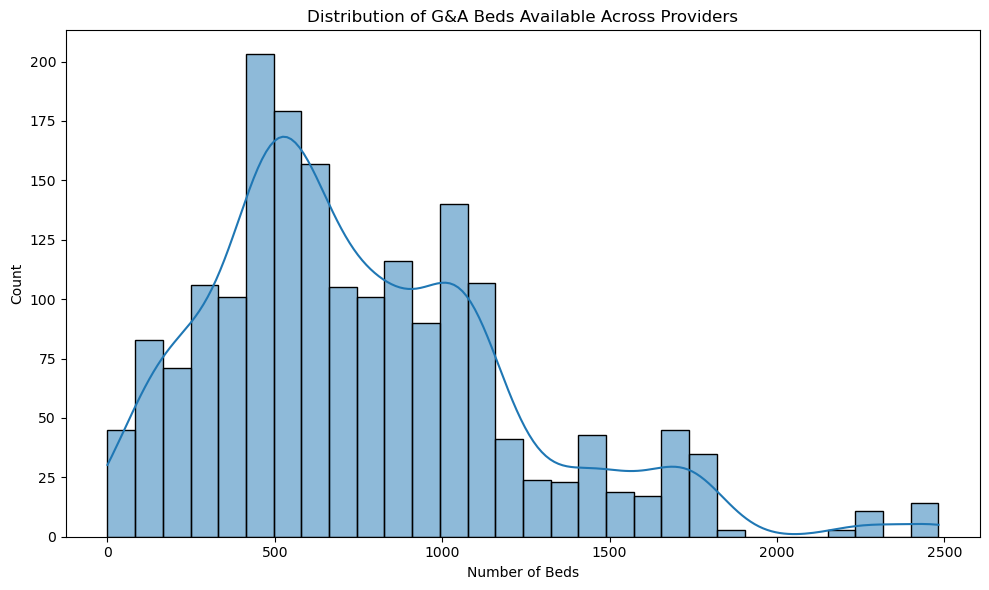

In [249]:
provider_beds = provider_df[
    (provider_df['Metric'] == 'G&A BA') &
    (provider_df['Type'].isin(['TYPE 1', 'OTHER']))
]


plt.figure(figsize=(10, 6))
sns.histplot(provider_beds['Value'], bins=30, kde=True)
plt.title('Distribution of G&A Beds Available Across Providers')
plt.xlabel('Number of Beds')
plt.tight_layout()
plt.show()
